In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras.utils as image
from keras import models
import numpy as np
import cv2 

In [54]:
model_name = "./cifar100.h5"

%store -r test_dir
%store -r train_dir
%store -r class_names
%store -r class_numbers

In [55]:
def create_confusion_matrix(y_true, y_pred):
    print("y_pred", y_pred)
    print("y_true", y_true)

    return confusion_matrix(y_true, y_pred, labels=class_names)

1/1 [==============================] - 0s 117ms/step
[[0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 50ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5995122e-10
  1.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 42ms/step
[[0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 49ms/step
[[0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 40ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 157ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9813345e-21
  1.0000000e+00 0.0000000e+00]]

Confusion Matrix

y_pred ['/mountain', '/telephone', '/mountain', '/mountain', '/telephone', '/telephone', '/telephone']
y_true ['/cattle', '/clock', '/house', '/mountain', '/plate', '/telephone', '/train']
[[0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 

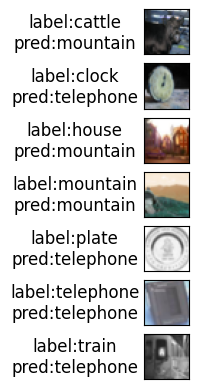

In [56]:
model = models.load_model(model_name)

y_pred = []
y_true = []

for x,name in enumerate(class_names):
    random=np.random.randint(1,100)
    path=(test_dir + name + '/' + str(random) + ".png")
    Giris1=image.load_img(path,
                          target_size=(32,32))

    #Numpy dizisine dönüştür
    Giris=image.img_to_array(Giris1)
    #Görüntüuü ağa uygula
    y=model.predict(Giris.reshape(1,32,32,3))
    print(y)
    #En yüksek tahmin sınıfını bul
    tahmin_indeks=np.argmax(y)
    tahmin_yuzde=y[0][tahmin_indeks]*100
    
    y_true.append(class_names[x])
    y_pred.append(class_names[tahmin_indeks])

    ax3 =plt.subplot(len(class_names), 1, x+1)
    ax3.set_yticks([])
    ax3.set_xticks([])
    plt.text(
        -50, 16,
        'label:{0}\npred:{1}'.format(class_names[x][1:],class_names[tahmin_indeks][1:]),
        rotation=0, verticalalignment='center', horizontalalignment='center', fontsize=12
    )
    # ax3.set_xlabel('label:{0}\npred:{1}'.format(class_names[x][1:],class_names[tahmin_indeks][1:]))
    plt.imshow(Giris1)

print("\nConfusion Matrix\n")
print(create_confusion_matrix(y_true, y_pred))